#  Title : Sentiment Analysis

- Objective:
 The objective of this project is to build a machine learning model that classifies text data into positive, negative, or neutral sentiments, providing insights into customer opinions and social media trends.

- Import Libraries

In [1]:
import pandas as pd 
import re 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt




# 1 Load dataset

In [2]:
df = pd.read_csv("Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# 2 Data Exploration and Cleaning

In [4]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

# 3 Plot Bar Graph


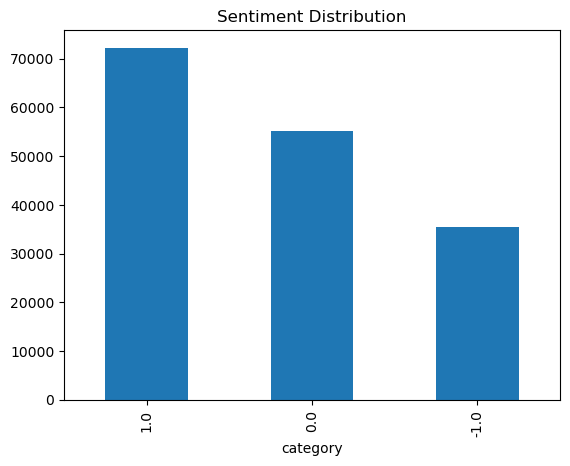

In [6]:
import matplotlib.pyplot as plt

df['category'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.show()


In [10]:
df['clean_text'].isnull().sum()


np.int64(4)

In [11]:
df = df.dropna(subset =['clean_text'])

In [12]:
df['clean_text'].isnull().sum()

np.int64(0)

In [13]:
df['clean_text'] = df['clean_text'].str.lower()


In [14]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [18]:
df['category'].isnull().sum()

np.int64(7)

In [19]:
df = df.dropna(subset=['category'])

In [20]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [23]:
df = df.dropna(subset=['clean_text', 'category'])


In [24]:
df = df.reset_index(drop=True)


In [25]:
df.isnull().sum()


clean_text    0
category      0
dtype: int64

In [26]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [28]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [29]:
y_pred = model.predict(X_test)


In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7374363379763147
              precision    recall  f1-score   support

        -1.0       0.91      0.42      0.57      7152
         0.0       0.88      0.67      0.76     11067
         1.0       0.65      0.95      0.78     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



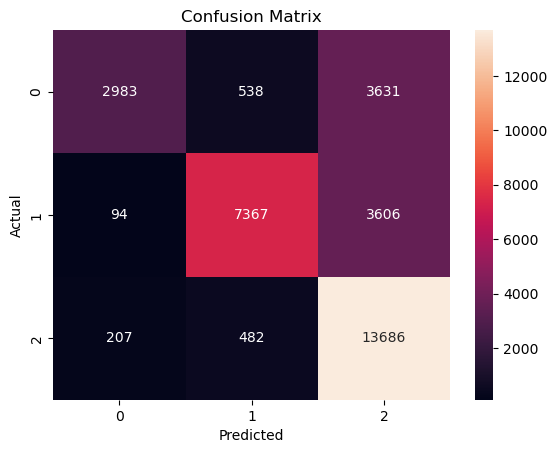

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
